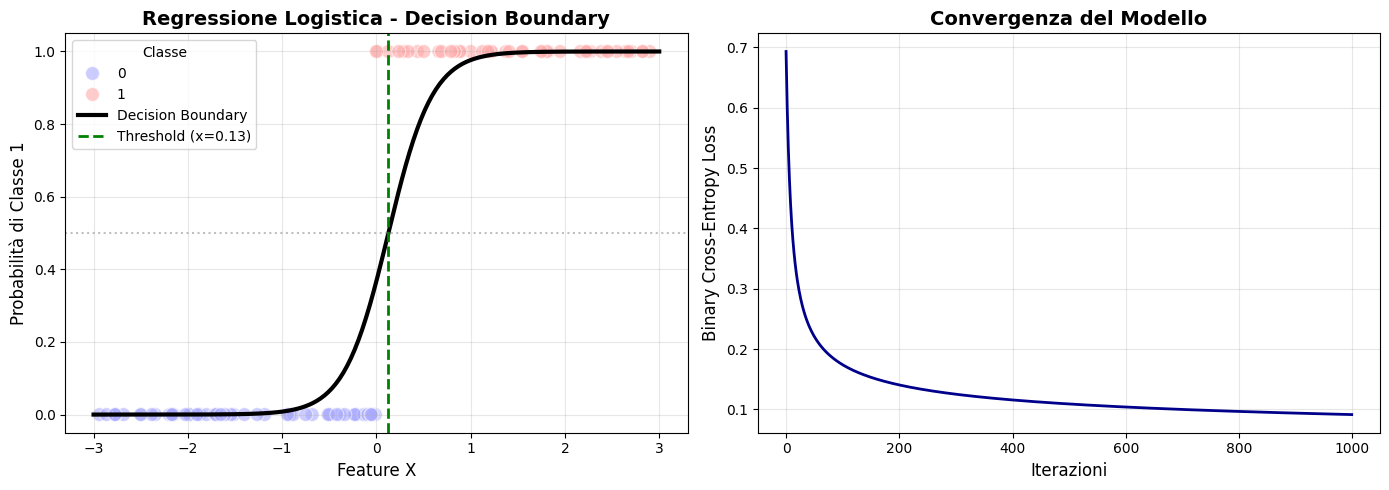


PARAMETRI APPRESI:
Peso (w[0]):     +4.2637
Bias (w[1]):     -0.5427
Decision Point:  0.1273
Final Loss:      0.091323

Accuratezza sul training set: 97.00%


In [39]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# DATASET SINTETICO
np.random.seed(9)
X = np.random.rand(100, 1) * 6 - 3  # 100 campioni tra -3 e +3
y = (X > 0).astype(int).flatten()  # Classe 0 se X < 0, classe 1 se X > 0
X_bias = np.hstack([X, np.ones((len(X), 1))])  # Incorpora il BIAS 

sigmoid = lambda s: 1 / (1 + np.exp(-s))  # Funzione SIGMOIDE

# INIZIALIZZAZIONE PARAMETRI
w = np.array([[0.0], [0.0]])  # Peso e BIAS iniziali
lr = 0.1  # Learning rate aumentato per convergenza più rapida

# DISCESA DEL GRADIENTE
losses = []
for idx in range(1000):
    preds = sigmoid(X_bias @ w)  # Predizioni (100, 1)
    dw = X_bias.T @ (preds - y.reshape(-1, 1)) / len(y)  # Gradiente medio
    w -= lr * dw  # Aggiorna i pesi
    
    # Calcola la loss (Binary Cross-Entropy)
    loss = -np.mean(y.reshape(-1, 1) * np.log(preds + 1e-10) + 
                    (1 - y.reshape(-1, 1)) * np.log(1 - preds + 1e-10))
    losses.append(loss)

# VISUALIZZAZIONE RISULTATI
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grafico 1: Decision Boundary
ax1 = axes[0]
sns.scatterplot(x=X.flatten(), y=y, hue=y, palette='bwr', 
                s=100, alpha=0.6, ax=ax1, legend=True)

# Crea la curva sigmoide usando i pesi appresi
x_line = np.linspace(-3, 3, 300)
# Calcola: sigmoid(w[0] * x + w[1])
z_line = w[0] * x_line + w[1]  # Combinazione lineare
y_line = sigmoid(z_line)  # Applica sigmoide

sns.lineplot(x=x_line, y=y_line.flatten(), color='black', 
             linewidth=3, ax=ax1, label='Decision Boundary')

# Linea verticale al punto di decisione (dove P = 0.5)
decision_point = -w[1] / w[0]  # Risolvi w[0]*x + w[1] = 0
ax1.axvline(x=decision_point, color='green', linestyle='--', 
            linewidth=2, label=f'Threshold (x={decision_point[0]:.2f})')
ax1.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)

ax1.set_xlabel('Feature X', fontsize=12)
ax1.set_ylabel('Probabilità di Classe 1', fontsize=12)
ax1.set_title('Regressione Logistica - Decision Boundary', fontsize=14, fontweight='bold')
ax1.legend(title='Classe', fontsize=10)
ax1.grid(alpha=0.3)

# Grafico 2: Curva di Loss
ax2 = axes[1]
ax2.plot(losses, linewidth=2, color='darkblue')
ax2.set_xlabel('Iterazioni', fontsize=12)
ax2.set_ylabel('Binary Cross-Entropy Loss', fontsize=12)
ax2.set_title('Convergenza del Modello', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Stampa i parametri appresi
print(f"\n{'='*50}")
print(f"PARAMETRI APPRESI:")
print(f"{'='*50}")
print(f"Peso (w[0]):     {w[0][0]:+.4f}")
print(f"Bias (w[1]):     {w[1][0]:+.4f}")
print(f"Decision Point:  {decision_point[0]:.4f}")
print(f"Final Loss:      {losses[-1]:.6f}")
print(f"{'='*50}\n")

# Verifica accuratezza
preds_final = (sigmoid(X_bias @ w) > 0.5).astype(int)
accuracy = np.mean(preds_final.flatten() == y)
print(f"Accuratezza sul training set: {accuracy*100:.2f}%")

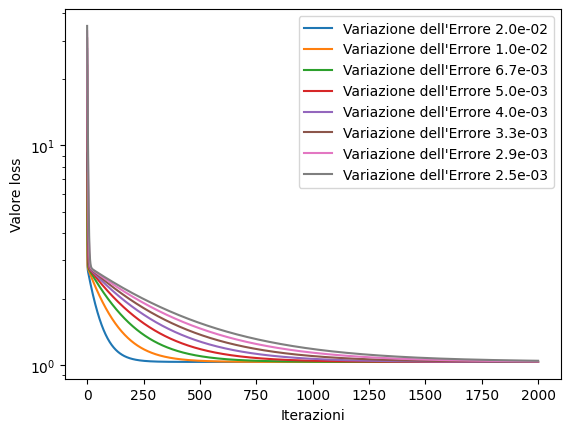

In [6]:
# LEAST SQUARE LEARNINGRATE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from FUNCTIONS import loss, x1, y, gradient

X = np.vstack([x1, np.ones(len(x1))]).T

for i in range(8):
    learningrate = 2e-2/(i+1)
    _, e = gradient(X, y, learningrate, 2000)
    ax = sns.lineplot(x=range(len(e)), y=e, label=f"Variazione dell'Errore {learningrate:.1e}")
    ax.set(xlabel='Iterazioni', ylabel='Valore loss', yscale='log')

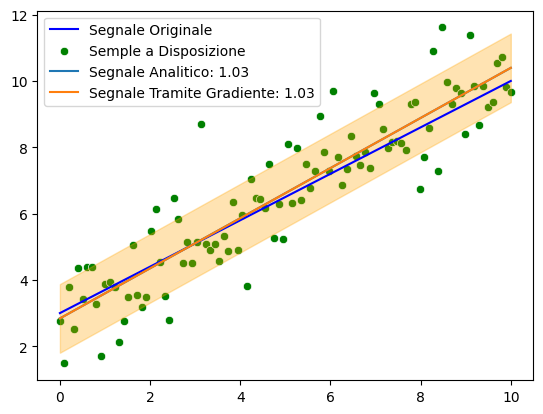

In [5]:
# LEAST SQUARE (DISCESA DEL GRADIENTE)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from FUNCTIONS import N, x1, y_gt, y, line, loss, gradient

np.random.seed(100)

X = np.vstack([x1, np.ones(len(x1))]).T

m_a, q_a = np.linalg.inv(X.T @ X) @ X.T @ y
(m_g, q_g), e_g = gradient(X,y)

# Soluzione analitica
w_opt_analytic = np.linalg.inv(X.T @ X) @ X.T @ y

y_analytic = line(x1, m_a, q_a)
y_gradient = line(x1, m_g, q_g)

sns.lineplot(x=x1, y=y_gt, label='Segnale Originale', color='blue')
sns.scatterplot(x=x1, y=y, label='Semple a Disposizione', color='green')

sns.lineplot(x=x1, y=y_analytic, label=f"Segnale Analitico: {loss(y_analytic):.2f}")
sns.lineplot(x=x1, y=y_gradient, label=f"Segnale Tramite Gradiente: {loss(y_gradient):.2f}")

sstar = 1/N*np.sum(np.power(y-X@w_opt_analytic,2))
plt.fill_between(x1, y_analytic-sstar, y_analytic+sstar, color='orange', alpha=0.3)


<Axes: >

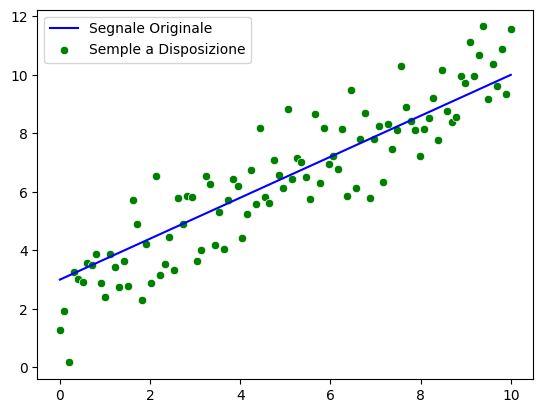

In [ ]:
# LEAST SQUARE (FORMA CHIUSA)

import seaborn as sns
import numpy as np

from FUNCTIONS import x1, y_gt, y

np.random.seed(100)

sns.lineplot(x=x1, y=y_gt, label='Segnale Originale', color='blue')
sns.scatterplot(x=x1, y=y, label='Semple a Disposizione', color='green')


In [ ]:
#FIBONACCI

arr2 = []

x = 1
y = 0
z = 0

for i in range(0, 100):

    z = x + y
    x = y
    y = z
    arr2.append(y)

print(arr2)

conta_p = 0
conta_d = 0

for i in arr2:
    if (i % 2) == 0:
        conta_p += 1
    else: 
        conta_d += 1

print(f"Nei primi 100 numeri della serie di Fiboncacci, vi sono {conta_p} numeri pari & {conta_d} numeri dispari in totale")

In [ ]:
#VAR DINAMICA

x = ''

for i in range(0, 6):
    x += '*'
    print(x)
    if(i == 5):
        for j in range(0, 6):
            y = x
            y = x[:-1]
            x = y
            print(y)


In [ ]:
#RICERCA STRINGHE IN DIZIONARIO

stri = "AmmaccaBananeAndCipolle"

diz = {"ammacca", "Hola", "banane", "Ducati", "cipolle"}

"""
parola1 = stri[0:7]
parola2 = stri[7:13].lower()
parola3 = stri[13:].lower()

for valore in diz:
    if parola1 in valore:
        print(valore)
              
if parola3 or parola2 in diz:
    print(parola2)
    print(parola3)
else:
    print("none")
"""
    
str1 = ""
for i, char in enumerate(stri):
    if char.isupper() and str1:
        # Stampa il segmento accumulato
        print(str1)
        str1 = char
    else:
        str1 += char

    # Gestisce l'ultimo carattere della stringa
    if i == len(stri) - 1:
        print(str1)


In [ ]:
#ORDINA ARRAY E TROVA LA COPPIA MOLTIPLICATA PIù GRANDE

numberz = [-13, 44, 122, -847, -123, 9872, 34]

numberz.sort()

for i in range(len(numberz) - 1):
    prod = numberz[i] * numberz[i+1]
    prod2 = prod
if (prod2 <= prod):
    print(prod)
else:
    print(prod2)

In [ ]:
#SAME SOPRA MA DIVERSO

numberz = [-13, 44, 122, -847, -123, 9872, 34]

numberz.sort()

for index, i in enumerate(numberz):
    if index < len(numberz)-1:
        y = i * numberz[index+1]
        print(y)

In [ ]:
#CAMELSTRING TO SNAKE_STRING (o con REGEX)

str1 = "camelStringCase"
str2 = ""

for char in str1:
    if char.isupper():
        str2 += "_"+char.lower()
    else:
        str2 += char
        str2.lstrip("_")
print(str2)
    

In [ ]:
#TEST DATA

anno_att = 2024
mese_attuale = 4
data_analisi = 2024-10-17

if mese_attuale == 7:
    mese_precedente = "03"

if mese_attuale == 10:
    mese_precedente = "06"

if mese_attuale == 1:
    mese_prece = "09"
    anno_att -= 1 

if mese_attuale == 4:
    mese_prece = "12"
    anno_att -= 1

anno_attuale = str(anno_att)

print(mese_precedente)

In [ ]:
# Controlli sulle variabili dinamiche affinche si prenda sempre il mese corretto e vengano convertite in stringhe

if mese_attuale%3 == 0:

    mese_prece = mese_attuale - 3

    if len(str(mese_prece)) < 2:
        mese_precedente = '0'+str(mese_prece)
    else:
        mese_precedente = str(mese_prece)

else:      
    mese_prece = 0

anno_attuale = str(anno_att)


In [ ]:
# TEST DATA 2

anno_att = 2026
mese_attuale = 2

mesi = []

#Controlli sulle variabili dinamiche affinché si prenda sempre il mese corretto e vengano convertite in stringhe
if mese_attuale != 1 and mese_attuale != 2:

    mese_prece_2 = mese_attuale - 2
    mese_prece_1 = mese_attuale - 1
    
    if len(str(mese_prece_2)) < 2:
        mesi.append('0'+str(mese_prece_2))
    else:
        mesi.append(str(mese_prece_2))
    
    if len(str(mese_prece_1)) < 2:
        mesi.append('0'+str(mese_prece_1))
    else:
        mesi.append(str(mese_prece_1))

    anno_attuale = str(anno_att)

elif mese_attuale == 1:

    mese_prece_2 = "11"     
    mese_prece_1 = "12"

    mesi.append(mese_prece_2)
    mesi.append(mese_prece_1)

    anno_attuale = str(anno_att-1)

elif mese_attuale == 2:

    mese_prece_1 = "01"

    mesi.append(mese_prece_1)

    anno_attuale = str(anno_att)

print(mese_prece_1)
print(anno_attuale)
print(mesi)

In [ ]:
#CICLO FOR

parola = ["apple","hello"]

vocali = ["a","e","i","o","u"]

for par in parola:
    for char in vocali:
        if par.startswith(char):
            str2 = par+"way"
            print(str2)
            break
        else:
            str1 = ""
            for i in range(1, len(par)):
                str1 += par[i]
            str2 = str1+par[0]+"ay"
            print(str2)
            break

In [ ]:
# SLICING STRINGHE

parola = ["apple","hello"]

vocali = ["a","e","i","o","u"]

for par in parola:
    if par[0] in vocali:
        str1 = par+"way"
        print(str1)
    else:
        str2 = par[1:]
        str3 = str2+par[0]+"ay"
        print(str3)

In [ ]:
#SLICING

parola = "hello"

vocali = ["a","e","i","o","u"]

if parola[0] in vocali:
    str1 = parola+"way"
    print(str1)
else:
    str2 = parola[::-1]
    str3 = str2+"rev"
    print(str3)

In [ ]:
#CICLO FOR

parola = "hello"

lung = len(parola) - 1

#print(lung)

str1 = ""

for i, char in enumerate(parola):
    j = lung
    str1 += parola[j]
    lung -= 1

print(str1)


In [ ]:
#CAMELCASE TO SNAKE_CASE

parola = "provaCheFunzioniQuestoScript"

str1 = ""

for char in parola:
    if char.isupper() == True :
        #print("ok")
        str1 += "_"+char.lower()
    else:
        str1 += char

print(str1)



In [ ]:
import random
import numpy as np
import heapq

num_rand = []

def heapsort(array):
    heapq.heapify(array)
    return [heapq.heappop(array) for _ in range(len(array))]

for n in range(1, 100000):

    num_rand.append(random.randint(-100000, 100000))

split_arr_num = np.array_split(num_rand,2)

for i in range(2):
    print(split_arr_num[i].tolist())
    ord = heapsort(split_arr_num[i].tolist())
    print(ord), print("\n")

    for index in range(len(ord)-1):
        coppia = ord[index]*ord[index+1]   
        if coppia >= (ord[index]*ord[index+1]):
            coppia = coppia
        else:
            coppia = ord[index]*ord[index+1]

    print(coppia)



In [ ]:
from PyQt5.QtWidgets import QApplication, QMainWindow, QVBoxLayout, QWidget, QPushButton, QLabel,  QLineEdit
import sys

class MyWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("TEST")
        self.setGeometry(100, 100, 600, 400)

        # Layout principale
        self.central_widget = QWidget()
        self.layout = QVBoxLayout()
       
        self.input = QLineEdit()
        self.input.setPlaceholderText("Inserisci dati")
        self.input.setMinimumHeight(25)
        self.input.setMaximumWidth(100)

        self.input2 = QLineEdit()
        self.input2.setPlaceholderText("Inserisci dati")
        self.input2.setMinimumHeight(25)
        self.input2.setMaximumWidth(100)
        
        self.button = QPushButton("Calcola")
        self.button.setMinimumHeight(25)
        self.button.setMaximumWidth(100)
        self.button.clicked.connect(self.update_label)

        # Widget
        self.label = QLabel("Benvenuto!")
        self.label.setStyleSheet("font-size: 20px; color: green;")

        # Aggiungi i widget al layout
        self.layout.addWidget(self.input)
        self.layout.addWidget(self.input2)
        self.layout.addWidget(self.button)
        self.layout.addWidget(self.label)

        self.central_widget.setLayout(self.layout)
        self.setCentralWidget(self.central_widget)

    def update_label(self):
        testo = self.input.text()
        self.label.setText(f"Hai scritto: {testo}")

if __name__ == "__main__":
    app = QApplication(sys.argv)
    window = MyWindow()
    window.show()
    sys.exit(app.exec_())


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Immagine RGB simulata (3x3 pixel)
T = np.random.rand(3, 3, 3)  # 3 canali (R, G, B)

plt.imshow(T)
plt.title("Tensore 3D (Immagine RGB)")
plt.show()
